In [1]:
import os
import cv2
import json
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
with open('img001.json') as f:
    data = json.load(f)
    
img_path = 'images/'

In [9]:
for key in tqdm(data):
    img_name = data[key]['filename']
    img = cv2.imread(f'img001 (2).jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = np.zeros((img.shape[0], img.shape[1]), dtype='float32')
    regions = data[key]['regions']
    for region in regions:
        x = region['shape_attributes']['all_points_x']
        y = region['shape_attributes']['all_points_y']
        arr = np.array(list(zip(x, y)))
        mask += cv2.fillPoly(np.zeros((img.shape[0], img.shape[1])), [arr], 1)
    mask[mask > 1] = 1
#     np.save(f'masks/{img_name.split(".")[0]}.npy', mask.astype('uint8'))
#     break

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
cv2.imwrite("mask.png", mask.astype("uint8"))

True

In [12]:
img = cv2.imread("img001 (2).jpg")
mask = cv2.imread("mask.png", cv2.IMREAD_UNCHANGED)

In [13]:
img.shape

(480, 848, 3)

In [14]:
mask.shape

(480, 848)

In [22]:
c = 0
for i in range(4):
    for j in range(7):
        img_crop = img[i*120:i*120+120, j*120:j*120+120]
        mask_crop = mask[i*120:i*120+120, j*120:j*120+120]
        cv2.imwrite(f"my_data/images/{c}.png", img_crop)
        cv2.imwrite(f"my_data/masks/{c}.png", mask_crop)
        c += 1

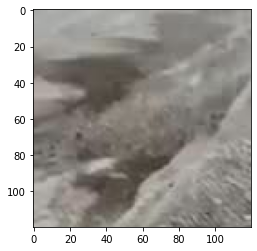

In [20]:
plt.imshow(img_crop)

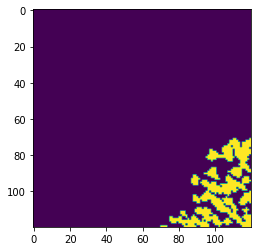

In [21]:
plt.imshow(mask_crop)

In [23]:
img = cv2.imread("my_data/images/22.png")
mask = cv2.imread("my_data/masks/22.png", cv2.IMREAD_UNCHANGED)

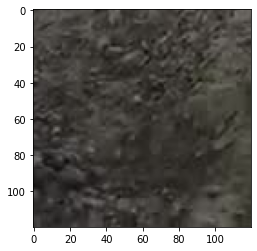

In [24]:
plt.imshow(img)

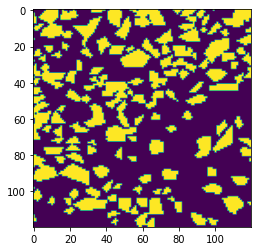

In [25]:
plt.imshow(mask)